#워드 임베딩

텍스트를 컴퓨터가 이해할 수 있도록 숫자로 변환해야함.  
그 중 학습을 통해 단어를 벡터화 하는 것이 워드 임베딩이다.

##희소표현(Sparse Representation)
원-핫 벡터에서 표현하고자 하는 단어의 인덱스의 값만 1이고, 나머지는 0임.  

**희소표현의 문제점**  
단어의 개수가 늘어나면 벡터차원이 한없이 커짐.  
-> 공간과 계산시간 낭비가 된다.  

DTM또한 희소표현의 일종인데 이도 같은 문제가 발생한다.

Ex) 강아지 = [ 0 0 0 0 1 0 0 0 0 0 0 0 ... 중략 ... 0]

##밀집 표현(Dense Representation)
희소표현과 반대되는 표현.  
단어 집합의 크기와 별개로 사용자가 직접 차원을 설정함.

Ex) 강아지 = [0.2 1.8 1.1 -2.1 1.1 2.8 ... 중략 ...]

##워드 임베딩(Word Embedding)
단어를 밀집 벡터의 형태로 표현하는 방법.  
여기서 나온 결과를 임베딩 벡터라고 함.  

**워드 임베딩 방법론**
- LSA
- Word2Vec
- FastText
- Glove

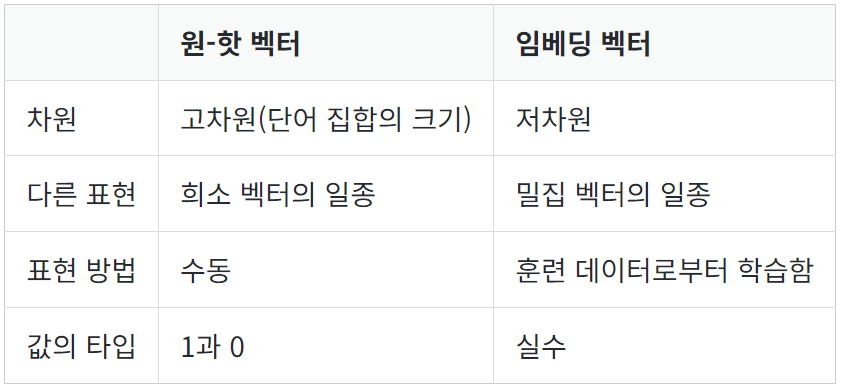



#워드투벡터(Word2Vec)

원-핫 벡터는 단어 벡터간 유의미한 유사도를 계산할 수 없다는 단점이 있음  
  
  
워드투벡터 사용 예시  
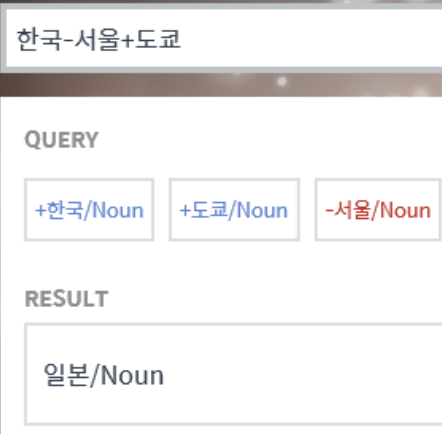  

워드투벡터에는 학습 방법이 두가지가 있음.  
- CBOW(Continuous Bag of Words)
- Skip-gram



##분산 표현(Distributed Representation)

단어의 의미를 다차원 공간에 벡터화 하는 방법  

분포가설이라는 가정하에 만들어진 표현방법임  
- '비슷한 문맥에서 등장하는 단어들은 비슷한 의미를 가진다'



##CBOW(Continuous Bag of Words)

주변에 있는 단어들을 입력으로 중간에 있는 단어를 예측하는 방법  

예문 : "The fat cat sat on the mat"  
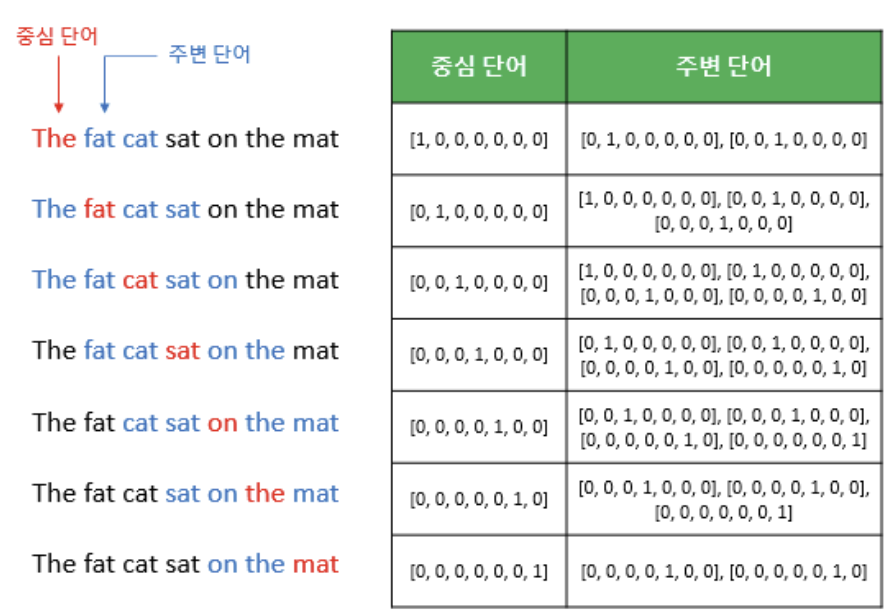


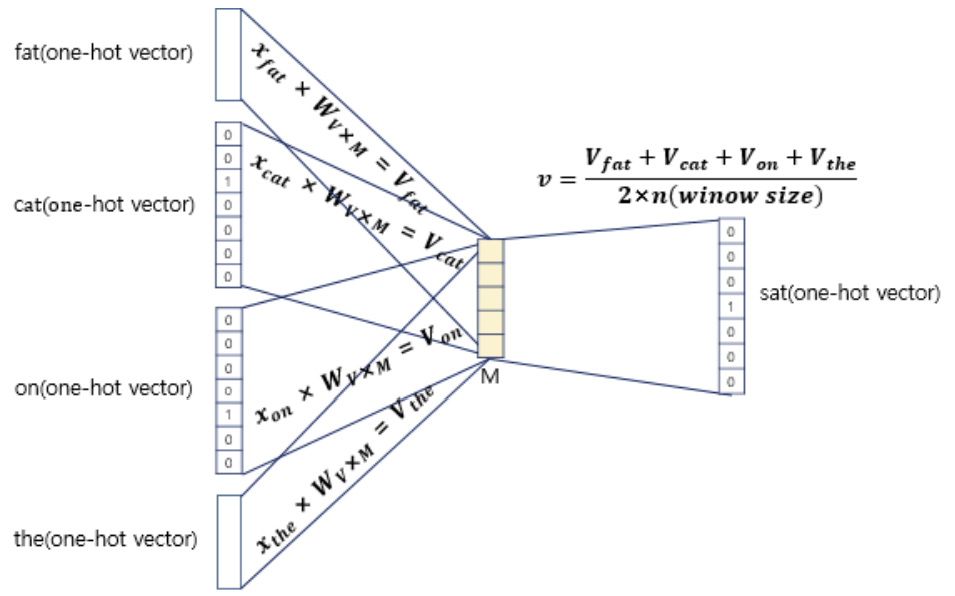

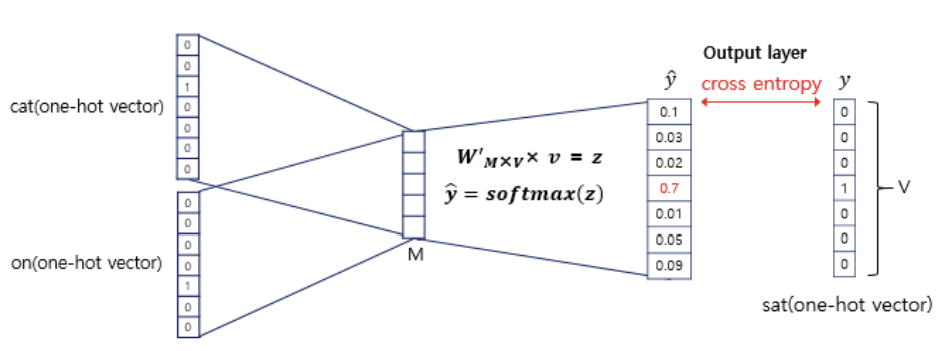

M차원의 크기를 갖는 W의 행렬의 행을 각 단어의 임베딩 벡터로 사용.

W와 W' 행렬 두 가지 모두를 가지고 임베딩 벡터를 사용하기도 함.

##Skip-gram

중간에 있는 단어를 입력으로 주변에 있는 단어를 예측하는 방법  
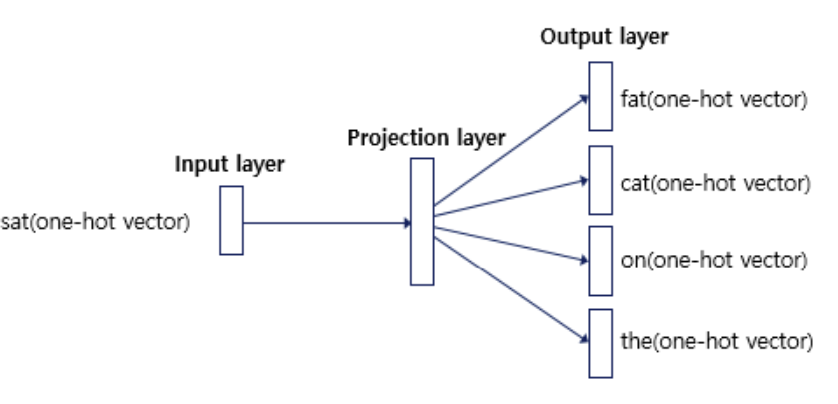



전반적으로 Skip-gram이 CBOW보다 성능이 좋다고 알려져 있음.

##NNLM Vs. Word2Vec
속도와 성능이 Word2Vec가 더 좋음.
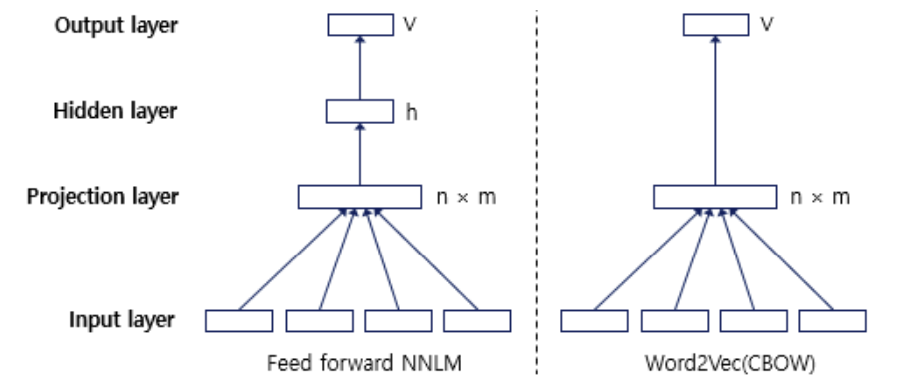

#영어/한국어 Word2Vec 실습

##영어 Word2Vec 만들기

In [1]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize


In [2]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")


('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7c292d21d8d0>)

In [4]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [5]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]


In [6]:
# 샘플 3개만 출력
for line in result[:3]:
    print(line)


['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


In [7]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)


In [8]:
model_result = model.wv.most_similar("man")
print(model_result)


[('woman', 0.842106819152832), ('guy', 0.8036840558052063), ('lady', 0.7903435826301575), ('girl', 0.7668213844299316), ('boy', 0.7353188991546631), ('soldier', 0.721256673336029), ('gentleman', 0.7087275385856628), ('kid', 0.6876643896102905), ('poet', 0.6703539490699768), ('surgeon', 0.6621217131614685)]


In [9]:
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드


#네거티브 샘플링을 이용한 Word2Vec 구현(Skip-Gram with Negative Sampling, SGNS)

워드투벡터 역전파 과정에서 모든 단어의 임베딩 벡터값을 업데이트 하는건 비효율적임.  

**네거티브 샘플링**  
단어 집합에서 무작위로 선택된 주변 단어가 아닌 단어들을 일부 가져옴.  
주변 단어들을 긍정(positive), 랜덤으로 샘플링 된 단어들을 부정(negative)으로 레이블링

##네거티브 샘플링 Skip-Gram(Skip-Gram with Negative Sampling, SGNS)

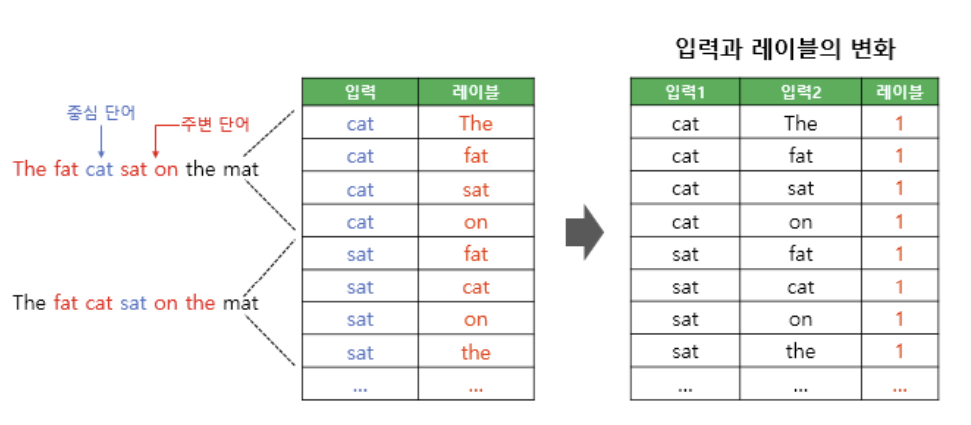

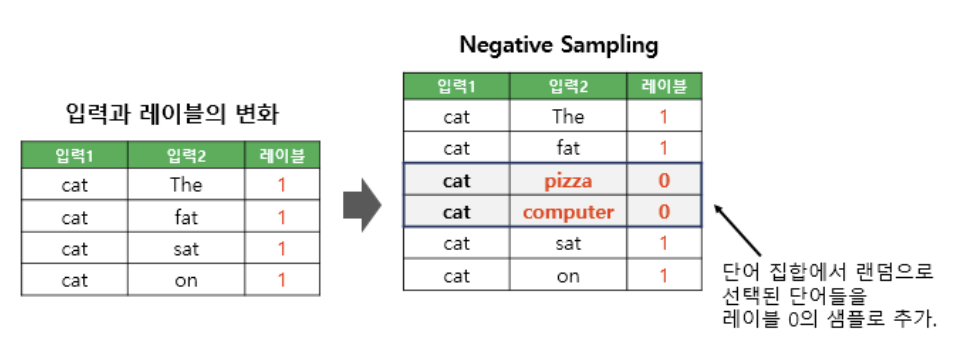

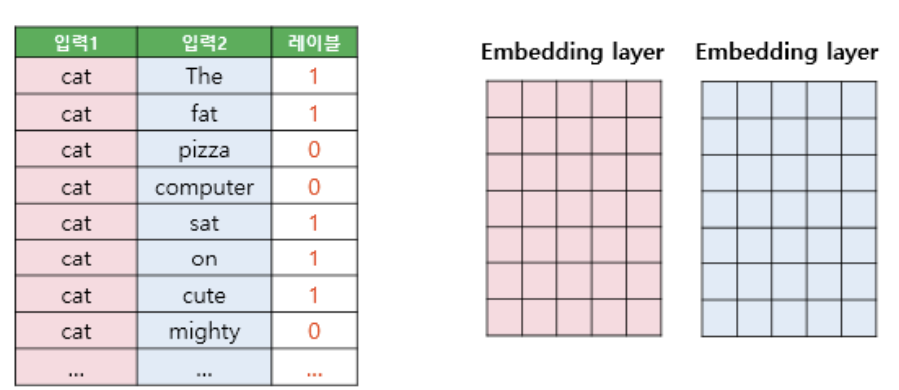

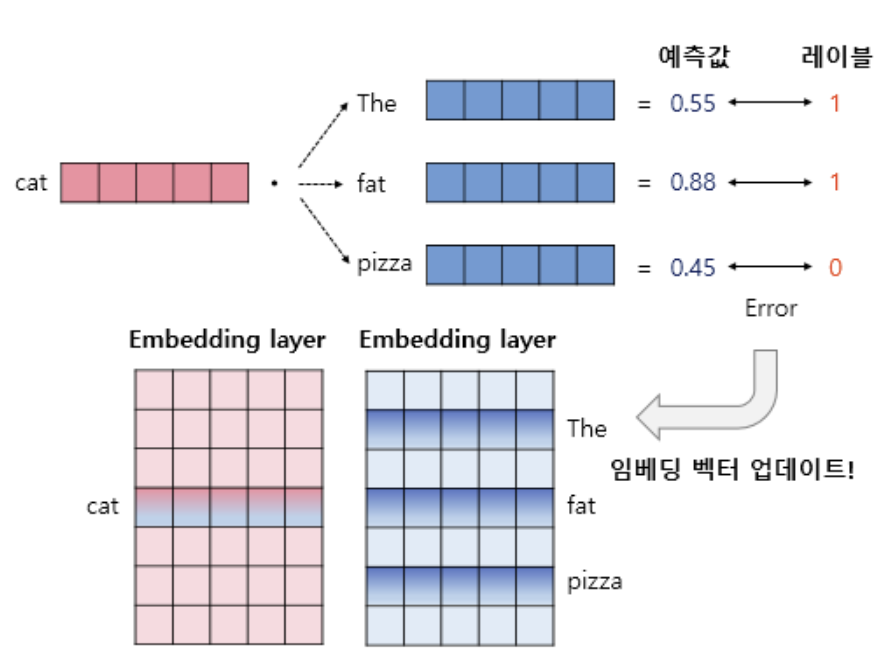

##구현

In [10]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer


In [11]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('총 샘플 수 :',len(documents))


총 샘플 수 : 11314


In [12]:
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())


In [13]:
news_df.isnull().values.any()


False

In [14]:
news_df.replace("", float("NaN"), inplace=True)
news_df.isnull().values.any()


True

In [15]:
news_df.dropna(inplace=True)
print('총 샘플 수 :',len(news_df))


총 샘플 수 : 11004


In [16]:
# 불용어를 제거
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc = tokenized_doc.to_list()


In [17]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

word2idx = tokenizer.word_index
idx2word = {value : key for key, value in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)


In [18]:
print(encoded[:2])


[[40, 53, 927, 143, 15889, 1684, 546, 279, 871, 12028, 17774, 24007, 29727, 279, 871, 63437, 871, 1128, 1103, 1999, 851, 29728, 913, 731, 20479, 279, 871, 170, 143, 1811, 149, 279, 20480, 17774, 6645, 5710, 76, 63438, 7, 36, 165, 614, 653, 29729, 6911, 24008, 2082, 829, 17775, 1119, 8790, 355, 1072, 15890, 671, 57, 163, 4231, 7206, 1933, 440, 56, 282, 4730, 9275, 2690, 39307], [1283, 429, 3, 52, 6165, 159, 112, 474, 89, 17776, 18, 63, 4731, 2865, 63439, 1042, 402, 39308, 8791, 902, 44, 8329, 316, 13042, 902, 3452, 5923, 533, 18, 87, 4732, 9872, 160, 1403, 120, 151, 5194, 63440, 63441, 17777, 63442, 13042, 903, 63443, 63444, 11172, 17778]]


In [19]:
vocab_size = len(word2idx) + 1
print('단어 집합의 크기 :', vocab_size)


단어 집합의 크기 : 181857


In [20]:
from tensorflow.keras.preprocessing.sequence import skipgrams
# 네거티브 샘플링
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:10]]


In [21]:
# 첫번째 샘플인 skip_grams[0] 내 skipgrams로 형성된 데이터셋 확인
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(5):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          idx2word[pairs[i][0]], pairs[i][0],
          idx2word[pairs[i][1]], pairs[i][1],
          labels[i]))


(media (871), letter (731)) -> 1
(u.s. (279), subsidizing (20480)) -> 1
(europeans (5710), 8500, (86740)) -> 0
(commited (8790), c-ya (150235)) -> 0
(media (871), media (871)) -> 1


In [22]:
print('전체 샘플 수 :',len(skip_grams))


전체 샘플 수 : 10


In [23]:
# 첫번째 뉴스그룹 샘플에 대해서 생긴 pairs와 labels의 개수
print(len(pairs))
print(len(labels))


2460
2460


In [24]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG


In [25]:
embedding_dim = 100

# 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1, ), dtype='int32')
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)

# 주변 단어를 위한 임베딩 테이블
c_inputs = Input(shape=(1, ), dtype='int32')
context_embedding  = Embedding(vocab_size, embedding_dim)(c_inputs)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding (Embedding)       (None, 1, 100)               1818570   ['input_1[0][0]']             
                                                          0                                       
                                                                                                  
 embedding_1 (Embedding)     (None, 1, 100)               1818570   ['input_2[0][0]']         

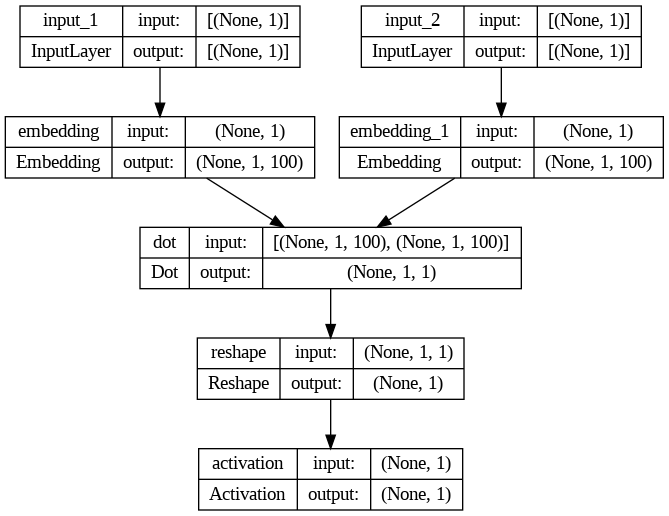

In [26]:
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True, rankdir='TB')


In [27]:
for epoch in range(1, 6):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X,Y)
    print('Epoch :',epoch, 'Loss :',loss)


Epoch : 1 Loss : 6.931419253349304
Epoch : 2 Loss : 6.90677809715271
Epoch : 3 Loss : 6.881017029285431
Epoch : 4 Loss : 6.8504921197891235
Epoch : 5 Loss : 6.812782883644104


In [28]:
import gensim

f = open('vectors.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

# 모델 로드
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)


NameError: name 'embed_size' is not defined

In [ ]:
w2v.most_similar(positive=['soldiers'])


In [ ]:
w2v.most_similar(positive=['doctor'])


#글로브(GloVe)

카운트 기반과 예측 기반을 모두 사용하는 단어 임베딩 방법.  

워드투벡터의 단점을 보안하기 위해 만들어졌고, 실제로 성능도 뛰어났음.  
지금까지 연구를 보면 뭐가 더 좋다고 단정지어 말할 순 없음.

LSA는 유추작업에서 성능이 떨어짐  
ex) 왕:남자 = 여왕:?

워드투벡터는 코퍼스의 전체적인 통계 정보를 반영하지 못함.  

GloVe의 아이디어  
**'임베딩 된 중심 단어와 주변 단어 벡터의 내적이 전체 코퍼스에서의 동시 등장 확률이 되도록 만드는 것'**

##윈도우 기반 동시 등장 행렬(Window based Co-occurrence Matrix)

예문  
- I like deep learning
- I like NLP
- I enjoy flying
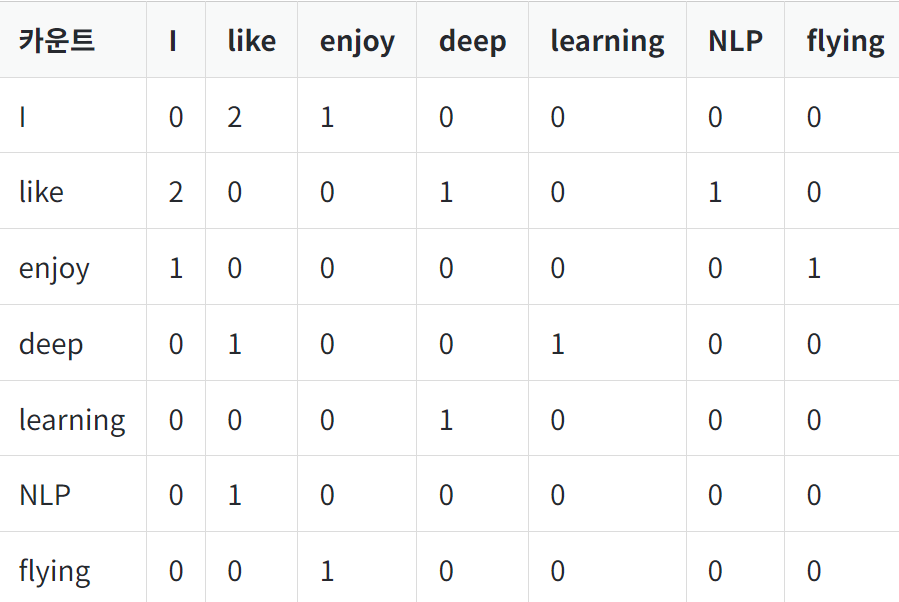


##동시 등장 확률(Co-occurrence Probability)

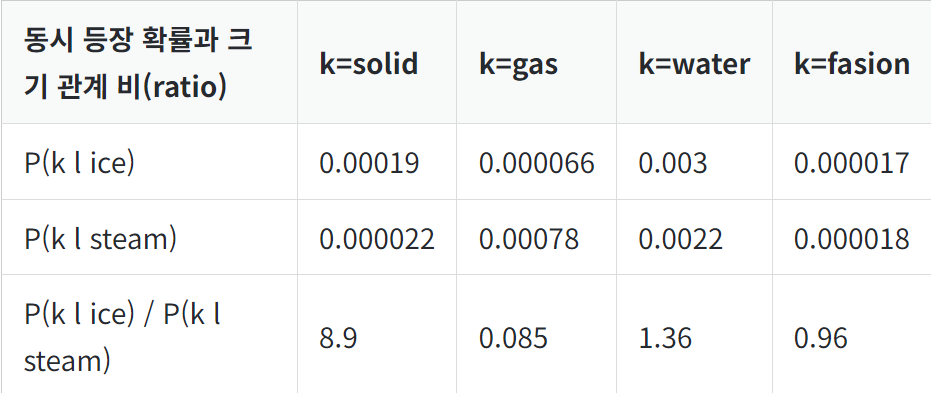

##손실 함수(Loss function)

https://wikidocs.net/22885

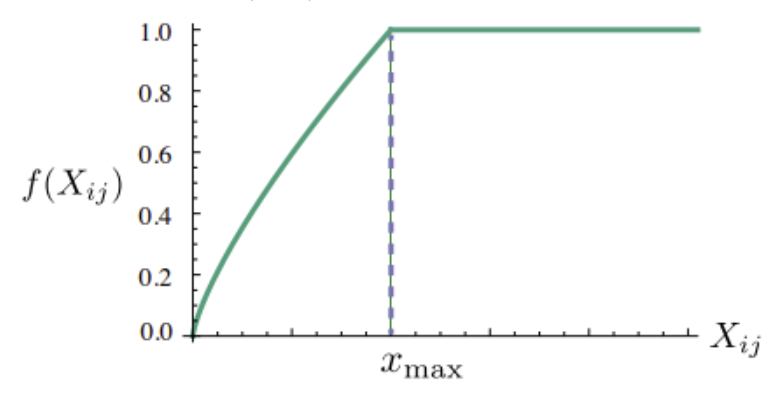

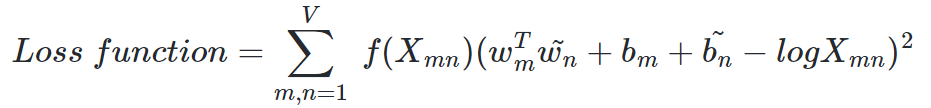

#패스트텍스트(FastText)

메커니즘 자체는 Word2Vec의 확장버전  

두개의 차이점은 단어를 쪼갠다는 것.(내부단어)

##내부 단어(subword)의 학습

예시 단어 : apple
```
# n = 3인 경우
<ap, app, ppl, ple, le>, <apple>
```
```
# n = 3 ~ 6인 경우
<ap, app, ppl, ppl, le>, <app, appl, pple, ple>, <appl, pple>, ..., <apple>
```
```
apple = <ap + app + ppl + ppl + le> + <app + appl + pple + ple> + <appl + pple> + , ..., +<apple>
```
여기서 apple의 벡터값은 저 위에 벡터값들의 총합으로 구성된다.

##장점
- 모르는단어(Out Of Vocabulary, OOV)도 처리 가능
- 빈도 수가 적었던 단어(Rare Word)도 처리 가능
- 노이즈가 많은 코퍼스도 처리 가능 - 오타나 맞춤법 문제